In [1]:
import matplotlib.pylab as plt

In [2]:
%matplotlib inline

# Test the Motif Plotting

The code is mostly taken and from this <a href="https://github.com/saketkc/motif-logos-matplotlib/blob/master/Motif%20Logos%20using%20matplotlib.ipynb">notebook</a>

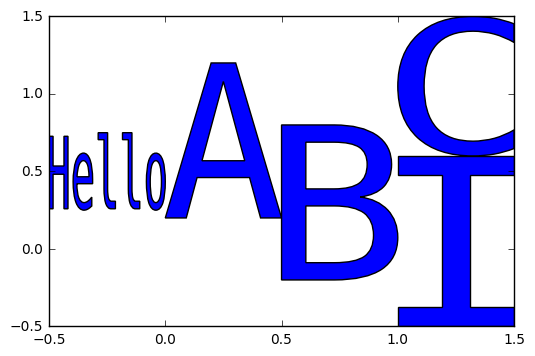

In [6]:
from motif_plotter import *

fig=plt.figure()
ax1=fig.add_subplot(111)
ax1.set_ylim(-0.5,1.5)
ax1.set_xlim(-0.5,1.5)

sentence_shape = make_text_elements('Hello', x=-0.5,y=0.25,width=0.5,height=0.5)
a_shape = make_text_elements('A', x=0,   y=0.2,  width=0.5)
b_shape = make_text_elements('B', x=0.5, y=-0.2, width=0.5)
c_shape = make_text_elements('C', x=1,   y=0.6,  width=0.5, height=0.9)
i_shape = make_text_elements('I', x=1, y=-0.5, width=0.5, height=1.1)
ax1.add_patch(sentence_shape)
ax1.add_patch(a_shape)
ax1.add_patch(b_shape)
ax1.add_patch(c_shape)
ax1.add_patch(i_shape)
plt.show()

In [29]:
from Bio import motifs

with open("examples/transfac_motif.txt") as handle:
    m = motifs.parse(handle, "transfac")





cbp = consensus_binding_plotter.ConsensusBindingPlotter(m)
cbp.plot()